# Alura Challenge: Análise de Evasão de Clientes (Churn)

## Introdução

O objetivo deste projeto é analisar o comportamento dos clientes de uma empresa de telecomunicações com o intuito de entender os fatores que levam à evasão (churn). A retenção de clientes é fundamental para a sustentabilidade do negócio, visto que conquistar um novo cliente tende a ser mais caro do que manter um existente. Através desta análise, buscamos fornecer insights para ajudar a reduzir a taxa de churn.

## Importação e Tratamento de Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados_1 = pd.json_normalize(dados['customer'])
dados_2 = pd.json_normalize(dados['phone'])
dados_3 = pd.json_normalize(dados['internet'])
dados_4 = pd.json_normalize(dados['account'])
df = pd.concat([dados.drop(['customer', 'phone','internet','account'], axis=1), dados_1,dados_2,dados_3,dados_4], axis=1)

# Primeira visualização
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [2]:
# Verificando tipos e valores ausentes
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [3]:
# Tratamento de valores ausentes (exemplo)
df.dropna(inplace=True)

In [4]:
# Conversão de colunas (exemplo)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.dropna(inplace=True)

In [5]:
# Verificando dados tratados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

## Análise Exploratória de Dados (EDA)

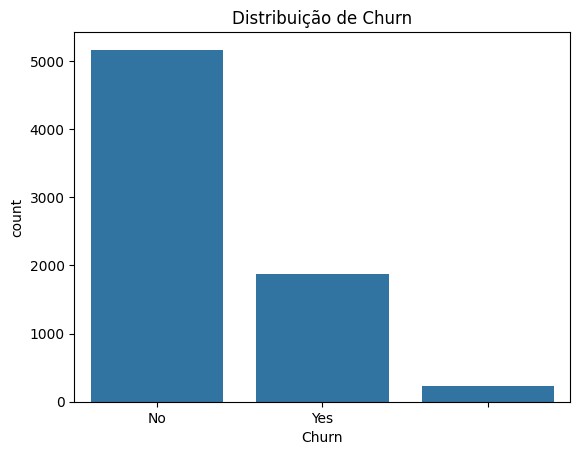

In [6]:
# Distribuição do churn
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

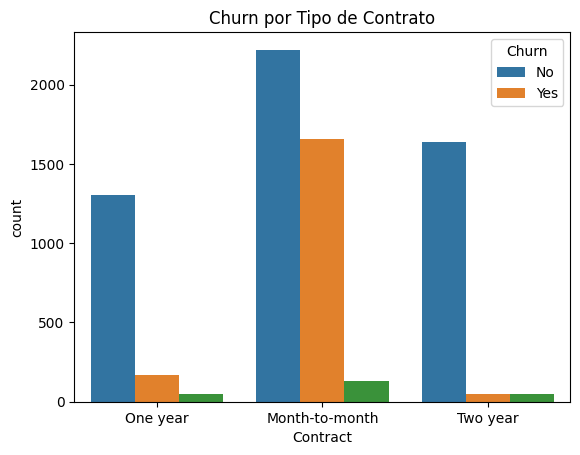

In [7]:
# Gráfico de churn por tipo de contrato
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()

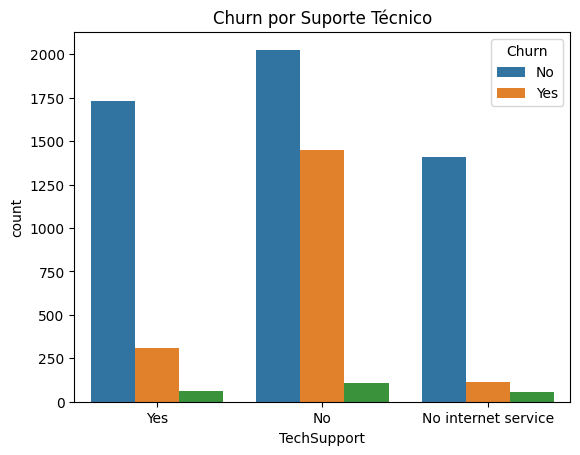

In [8]:
# Gráfico de churn por serviço de suporte
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn por Suporte Técnico')
plt.show()

<Axes: xlabel='cobranca_mensal', ylabel='Count'>

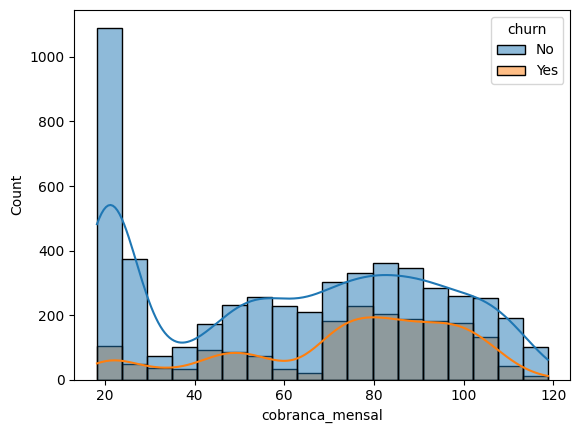

In [68]:
sns.histplot(data=dados_teste, x='cobranca_mensal', hue='churn', kde=True)


In [69]:
dados_teste.columns

Index(['churn', 'genero', 'idoso', 'possui_conjuge', 'possui_dependentes',
       'meses_com_empresa', 'servico_telefonia', 'multiplas_linhas',
       'tipo_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming',
       'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'cobranca_mensal', 'cobranca_total',
       'tempo_estimado'],
      dtype='object')

## Conclusões e Insights

- Clientes com contratos mensais têm maior probabilidade de churn.
- A ausência de serviços adicionais como suporte técnico está associada a maior evasão.
- Valores maiores em "TotalGasto" nem sempre estão relacionados a churn.
- Clientes com muitos meses de serviço tendem a permanecer mais.

## Recomendações

- Criar programas de fidelidade ou descontos para clientes com contratos mensais.
- Incentivar a adesão a serviços adicionais como suporte técnico e backup.
- Monitorar clientes nos primeiros meses de serviço e oferecer benefícios exclusivos.
- Focar em ações preventivas para clientes que estão começando a demonstrar insatisfação.

## Encerramento

Com base na análise exploratória realizada, é possível identificar padrões relevantes que ajudam na criação de estratégias de retenção. Reforça-se a importância de uma análise contínua e da aplicação de modelos preditivos em etapas futuras para melhorar a capacidade de previsão de churn.

In [9]:
dados = df.copy()

In [10]:
dados_teste = df.copy()

In [11]:
import pandas as pd

# Supondo que seu DataFrame seja chamado dados_teste

# Checar valores ausentes
print("🔎 Valores nulos (NaN ou None):")
print(dados_teste.isnull().sum())

# Checar espaços em branco ou campos vazios em colunas do tipo texto
print("\n🔎 Valores em branco ou com apenas espaços:")
for col in dados_teste.columns:
    if dados_teste[col].dtype == 'object':
        vazio = dados_teste[col].apply(lambda x: str(x).strip() == '').sum()
        if vazio > 0:
            print(f"- {col}: {vazio} valores em branco")

# Verificar valores únicos por coluna (útil para inspecionar valores inesperados como ' ')
print("\n📊 Valores únicos por coluna (resumo):")
for col in dados_teste.columns:
    print(f"- {col}: {dados_teste[col].nunique()} valores únicos")


🔎 Valores nulos (NaN ou None):
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

🔎 Valores em branco ou com apenas espaços:
- Churn: 224 valores em branco

📊 Valores únicos por coluna (resumo):
- customerID: 7256 valores únicos
- Churn: 3 valores únicos
- gender: 2 valores únicos
- SeniorCitizen: 2 valores únicos
- Partner: 2 valores únicos
- Dependents: 2 valores únicos
- tenure: 72 valores únicos
- PhoneService: 2 valores únicos
- MultipleLines: 3 valores únicos
- InternetService: 3 valores únicos
- OnlineSecurity: 3 valores únicos
- OnlineBackup: 3 valores únicos
-

In [12]:
dados_teste = dados_teste[dados_teste['Churn'].str.strip() != '']


In [13]:
dados_teste['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
mapeamento_colunas = {
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'possui_conjuge',
    'Dependents': 'possui_dependentes',
    'tenure': 'meses_com_empresa',
    'PhoneService': 'servico_telefonia',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'filmes_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'cobranca_mensal',
    'Charges.Total': 'cobranca_total'
}

# 3. Renomear as colunas
dados_teste.rename(columns=mapeamento_colunas, inplace=True)

# Verificar as novas colunas
print(dados_teste.columns)

Index(['id_cliente', 'churn', 'genero', 'idoso', 'possui_conjuge',
       'possui_dependentes', 'meses_com_empresa', 'servico_telefonia',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'tv_streaming', 'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'cobranca_mensal', 'cobranca_total'],
      dtype='object')


/tmp/ipython-input-14-3466164254.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste.rename(columns=mapeamento_colunas, inplace=True)


In [57]:
df.head()
churn_para_corr = {'No':0,'Yes':1}
df['churn_corr'] = df['Churn'].map(churn_para_corr)

In [61]:
df[['churn_corr','Charges.Total']].corr()


,churn_corr,Charges.Total
churn_corr,1.000000,-0.199484
Charges.Total,-0.199484,1.000000


In [16]:
# 1. Remover coluna irrelevante
dados_teste.drop(columns=['id_cliente'], inplace=True)


# 2. Criar tempo estimado com base em cobranca_total / cobranca_mensal
dados_teste['tempo_estimado'] = dados_teste.apply(
    lambda row: row['cobranca_total'] / row['cobranca_mensal']
    if row['cobranca_mensal'] > 0 else 0,
    axis=1
)


# 3. Verificar resultado
print(dados_teste.head())
print("\nColunas após transformação:\n", dados_teste.columns.tolist())


  churn  genero  idoso possui_conjuge possui_dependentes  meses_com_empresa  \
0    No  Female      0            Yes                Yes                  9   
1    No    Male      0             No                 No                  9   
2   Yes    Male      0             No                 No                  4   
3   Yes    Male      1            Yes                 No                 13   
4   Yes  Female      1            Yes                 No                  3   

  servico_telefonia multiplas_linhas tipo_internet seguranca_online  ...  \
0               Yes               No           DSL               No  ...   
1               Yes              Yes           DSL               No  ...   
2               Yes               No   Fiber optic               No  ...   
3               Yes               No   Fiber optic               No  ...   
4               Yes               No   Fiber optic               No  ...   

  protecao_dispositivo suporte_tecnico tv_streaming filmes_streaming

In [17]:
dados_teste.head()

,churn,genero,idoso,possui_conjuge,possui_dependentes,meses_com_empresa,servico_telefonia,multiplas_linhas,tipo_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento,cobranca_mensal,cobranca_total,tempo_estimado
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128


### Criação e teste de modelo


In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
x = dados_teste.drop(columns = 'churn',axis = 1)
y = dados_teste['churn']

In [20]:
x_colunas = x.columns
x_colunas

Index(['genero', 'idoso', 'possui_conjuge', 'possui_dependentes',
       'meses_com_empresa', 'servico_telefonia', 'multiplas_linhas',
       'tipo_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming',
       'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'cobranca_mensal', 'cobranca_total',
       'tempo_estimado'],
      dtype='object')

In [21]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),
     ['genero', 'possui_conjuge', 'possui_dependentes', 'tipo_internet',
      'seguranca_online', 'backup_online', 'multiplas_linhas', 'suporte_tecnico',
      'tipo_contrato', 'metodo_pagamento','servico_telefonia','protecao_dispositivo','tv_streaming','filmes_streaming','fatura_digital']),
    remainder='passthrough',
    sparse_threshold=0
)

In [22]:
x = one_hot.fit_transform(x)

In [23]:
one_hot.get_feature_names_out(x_colunas)

array(['onehotencoder__genero_Male', 'onehotencoder__possui_conjuge_Yes',
       'onehotencoder__possui_dependentes_Yes',
       'onehotencoder__tipo_internet_DSL',
       'onehotencoder__tipo_internet_Fiber optic',
       'onehotencoder__tipo_internet_No',
       'onehotencoder__seguranca_online_No',
       'onehotencoder__seguranca_online_No internet service',
       'onehotencoder__seguranca_online_Yes',
       'onehotencoder__backup_online_No',
       'onehotencoder__backup_online_No internet service',
       'onehotencoder__backup_online_Yes',
       'onehotencoder__multiplas_linhas_No',
       'onehotencoder__multiplas_linhas_No phone service',
       'onehotencoder__multiplas_linhas_Yes',
       'onehotencoder__suporte_tecnico_No',
       'onehotencoder__suporte_tecnico_No internet service',
       'onehotencoder__suporte_tecnico_Yes',
       'onehotencoder__tipo_contrato_Month-to-month',
       'onehotencoder__tipo_contrato_One year',
       'onehotencoder__tipo_contrato_Two ye

In [24]:
pd.DataFrame(x,columns = one_hot.get_feature_names_out(x_colunas))

,onehotencoder__genero_Male,onehotencoder__possui_conjuge_Yes,onehotencoder__possui_dependentes_Yes,onehotencoder__tipo_internet_DSL,onehotencoder__tipo_internet_Fiber optic,onehotencoder__tipo_internet_No,onehotencoder__seguranca_online_No,onehotencoder__seguranca_online_No internet service,onehotencoder__seguranca_online_Yes,onehotencoder__backup_online_No,...,onehotencoder__tv_streaming_Yes,onehotencoder__filmes_streaming_No,onehotencoder__filmes_streaming_No internet service,onehotencoder__filmes_streaming_Yes,onehotencoder__fatura_digital_Yes,remainder__idoso,remainder__meses_com_empresa,remainder__cobranca_mensal,remainder__cobranca_total,remainder__tempo_estimado
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30,9.044207
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,9.0,59.90,542.40,9.055092
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85,3.800406
3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,13.0,98.00,1237.85,12.631122
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,13.0,55.15,742.90,13.470535
7028,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,22.0,85.10,1873.70,22.017626
7029,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75,1.843936
7030,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,67.0,67.85,4627.65,68.204127


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
y = label_encoder.fit_transform(y)


In [28]:
from sklearn.model_selection import train_test_split


x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y,
    test_size=0.3,            # 30% para teste (ajustável)
    stratify=y,               # mantém proporção de churn sim/não
    random_state=42           # garante reprodutibilidade
)


In [29]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(x_treino,y_treino)
score = dummy.score(x_treino,y_treino)

print(f'O Modelo dummy teve uma performance de: {score:.2f}%')

O Modelo dummy teve uma performance de: 0.73%


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
modelo = RandomForestClassifier (random_state = 42, max_depth = 10)
modelo.fit(x_treino,y_treino)
y_pred = modelo.predict(x_teste)
print("Relatório de classificação:\n")
print(classification_report(y_teste, y_pred))

print("Matriz de confusão:\n")
print(confusion_matrix(y_teste, y_pred))

Relatório de classificação:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Matriz de confusão:

[[1394  155]
 [ 274  287]]


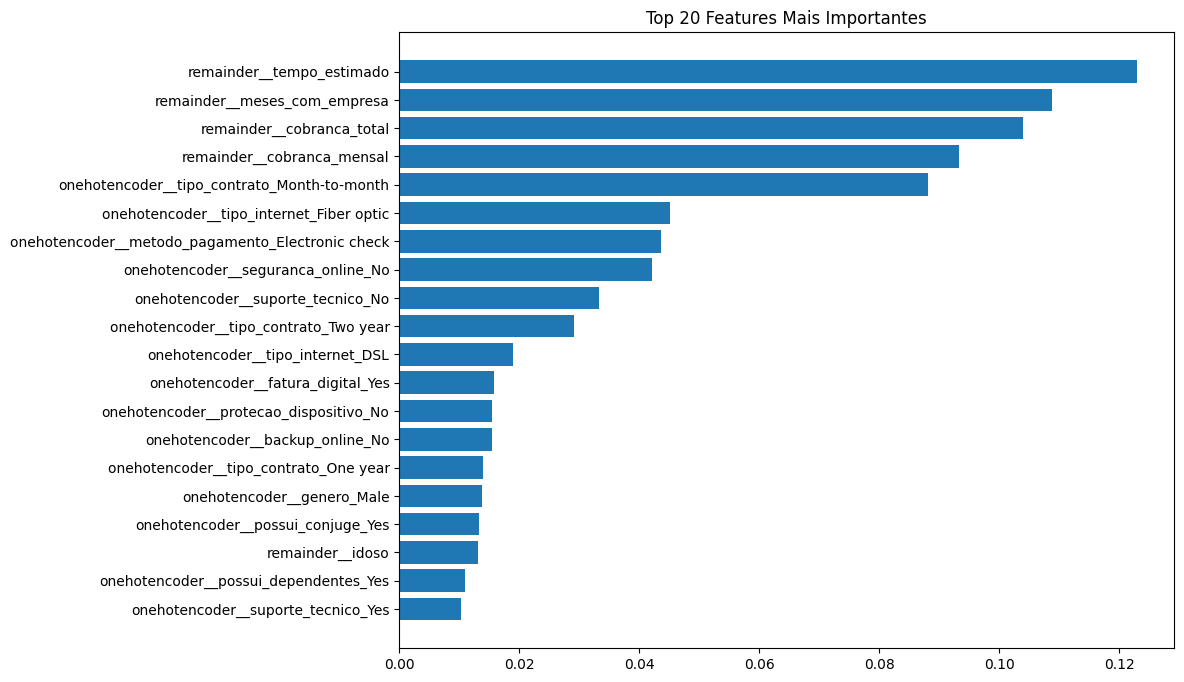

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

importances = modelo.feature_importances_
features = one_hot.get_feature_names_out(x_colunas)

df_importances = pd.DataFrame({'feature': features, 'importance': importances})
df_importances = df_importances.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(df_importances['feature'][:20], df_importances['importance'][:20])
plt.gca().invert_yaxis()
plt.title('Top 20 Features Mais Importantes')
plt.show()


In [33]:
df_importances

,feature,importance
40,remainder__tempo_estimado,0.123000
37,remainder__meses_com_empresa,0.108777
39,remainder__cobranca_total,0.103937
38,remainder__cobranca_mensal,0.093207
18,onehotencoder__tipo_contrato_Month-to-month,0.088056
4,onehotencoder__tipo_internet_Fiber optic,0.045176
23,onehotencoder__metodo_pagamento_Electronic check,0.043592
6,onehotencoder__seguranca_online_No,0.042172
15,onehotencoder__suporte_tecnico_No,0.033269
20,onehotencoder__tipo_contrato_Two year,0.029066


In [34]:
columns = one_hot.get_feature_names_out(x_colunas)

# Converte x (ndarray) em DataFrame com nomes das colunas
x_df = pd.DataFrame(x, columns=columns)

# Remove a coluna
x_sem_estimado = x_df.drop(columns=['remainder__tempo_estimado'])

In [35]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(
    x_sem_estimado, y,
    test_size=0.3,            # 30% para teste (ajustável)
    stratify=y,               # mantém proporção de churn sim/não
    random_state=42           # garante reprodutibilidade
)


In [36]:
modelo_sem_estimado = RandomForestClassifier()
modelo_sem_estimado.fit(x_train,y_train)
y_previsto = modelo_sem_estimado.predict(x_test)
print("Relatório de classificação:\n")
print(classification_report(y_teste, y_previsto))

print("Matriz de confusão:\n")
print(confusion_matrix(y_teste, y_previsto))

Relatório de classificação:

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Matriz de confusão:

[[1378  171]
 [ 293  268]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo com peso balanceado
modelo_balanceado = RandomForestClassifier(
    random_state=42,
    max_depth=10,
    class_weight='balanced'
)

modelo_balanceado.fit(x_train, y_train)

# Previsões
y_pred_balanceado = modelo_balanceado.predict(x_test)

# Avaliação
print("Relatório de classificação com class_weight='balanced':\n")
print(classification_report(y_test, y_pred_balanceado))

print("Matriz de confusão:\n")
print(confusion_matrix(y_test, y_pred_balanceado))


Relatório de classificação com class_weight='balanced':

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1549
           1       0.55      0.71      0.62       561

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.79      0.77      0.78      2110

Matriz de confusão:

[[1228  321]
 [ 165  396]]


In [38]:
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn.fit(x_treino_normalizado,y_treino)

KNeighborsClassifier()

In [40]:
x_teste_normalizado = normalizacao.transform(x_teste)
Knn.score(x_teste_normalizado, y_teste)


0.761611374407583

In [41]:

print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Floresta: {modelo.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {Knn.score(x_teste_normalizado, y_teste)}')


Acurácia Dummy: 0.7341232227488151
Acurácia Floresta: 0.7966824644549763
Acurácia KNN: 0.761611374407583


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

y_knn_pred = Knn.predict(x_teste_normalizado)
print("Relatório de classificação (KNN):\n")
print(classification_report(y_teste, y_knn_pred))
print("Matriz de confusão:\n")
print(confusion_matrix(y_teste, y_knn_pred))



Relatório de classificação (KNN):

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.52      0.54       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.69      2110
weighted avg       0.76      0.76      0.76      2110

Matriz de confusão:

[[1315  234]
 [ 269  292]]


In [43]:
for k in [3, 5, 7, 10, 15, 20]:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(x_treino_normalizado, y_treino)
    y_pred = modelo.predict(x_teste_normalizado)
    print(f"K={k}")
    print(classification_report(y_teste, y_pred))


K=3
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.53      0.52      0.53       561

    accuracy                           0.75      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.75      0.75      0.75      2110

K=5
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.52      0.54       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.69      2110
weighted avg       0.76      0.76      0.76      2110

K=7
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.58      0.54      0.56       561

    accuracy                           0.77      2110
   macro avg       0.71      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110

K=10
  

In [44]:
from sklearn.metrics import classification_report

y_proba = modelo.predict_proba(x_teste_normalizado)[:, 1]
y_custom = (y_proba >= 0.4).astype(int)  # testar com 0.4

print(classification_report(y_teste, y_custom))


              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1549
           1       0.51      0.72      0.60       561

    accuracy                           0.74      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.74      0.75      2110



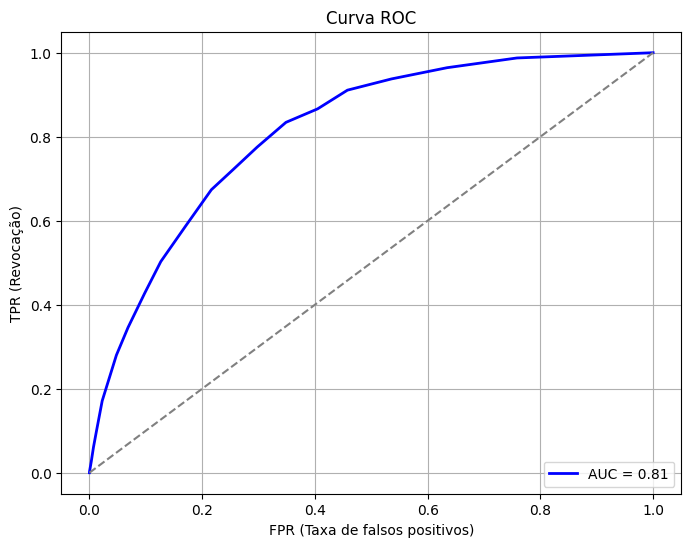

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades do modelo (classe positiva)
y_proba = modelo.predict_proba(x_teste_normalizado)[:, 1]

# Calcula curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_proba)
roc_auc = auc(fpr, tpr)

# Plota curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (Taxa de falsos positivos)')
plt.ylabel('TPR (Revocação)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


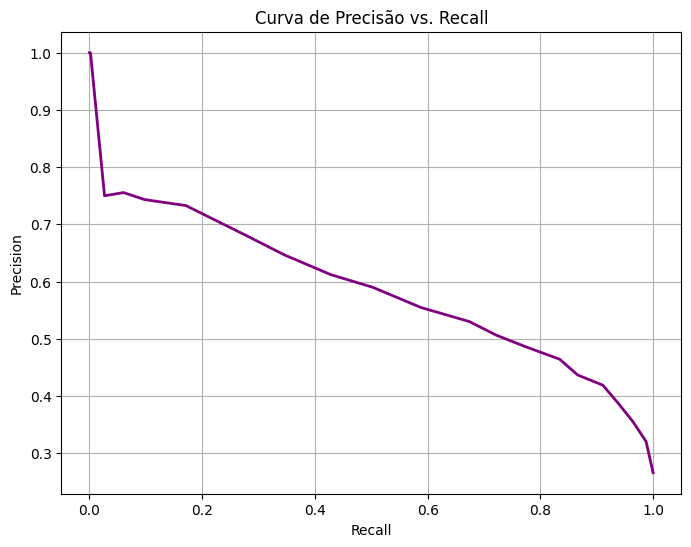

In [46]:
from sklearn.metrics import precision_recall_curve

# Calcula curva precisão-revocação
precision, recall, thresholds = precision_recall_curve(y_teste, y_proba)

# Plota curva
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisão vs. Recall')
plt.grid(True)
plt.show()


In [47]:
from sklearn.metrics import average_precision_score
ap = average_precision_score(y_teste, y_proba)
print(f"AP (Área sob a curva Precision-Recall): {ap:.2f}")


AP (Área sob a curva Precision-Recall): 0.57


In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, KFold
modelo = RandomForestClassifier( random_state=42,
    max_depth=10,
    class_weight='balanced')
skf = StratifiedKFold(n_splits = 5 , shuffle = True, random_state =42)
cv_resultados = cross_validate(modelo, x,y ,cv = skf, scoring = 'recall')
cv_resultados


{'fit_time': array([1.5672524 , 1.075279  , 0.74652863, 0.91553974, 0.78323007]),
 'score_time': array([0.08863997, 0.03607678, 0.0308435 , 0.05242729, 0.02925253]),
 'test_score': array([0.70320856, 0.69251337, 0.69168901, 0.71390374, 0.72727273])}

In [49]:
cv_resultados['test_score']
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


Intervalo de confiança: [0.6787495759159778, 0.7326853855899504]


In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, KFold
modelo = RandomForestClassifier( random_state=42,
    max_depth=10,
    class_weight='balanced')
skf = StratifiedKFold(n_splits = 5 , shuffle = True, random_state =42)
scoring = ['recall', 'precision', 'accuracy', 'roc_auc']
cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring=scoring)
cv_resultados


{'fit_time': array([0.69520235, 0.69422817, 0.66917181, 0.72696376, 0.67664742]),
 'score_time': array([0.06210017, 0.06466341, 0.06175518, 0.05805111, 0.06212068]),
 'test_recall': array([0.70320856, 0.69251337, 0.69168901, 0.71390374, 0.72727273]),
 'test_precision': array([0.59908884, 0.56923077, 0.54315789, 0.56929638, 0.55060729]),
 'test_accuracy': array([0.7960199 , 0.77896233, 0.76386913, 0.7802276 , 0.76955903]),
 'test_roc_auc': array([0.85635525, 0.85071776, 0.83146514, 0.84606366, 0.84245067])}

In [51]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define o pipeline
# pipeline = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
# ])

# # Espaço de parâmetros para tunar
# param_dist = {
#     'rf__n_estimators': randint(50, 200),
#     'rf__max_depth': randint(5, 20),
#     'rf__min_samples_split': randint(2, 10),
#     'rf__min_samples_leaf': randint(1, 10),
#     'rf__max_features': ['sqrt', 'log2', None]
# }

# # Configura o RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     pipeline,
#     param_distributions=param_dist,
#     n_iter=30,
#     cv=5,
#     scoring='recall',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Executa o RandomizedSearchCV
# random_search.fit(x, y)

# # Resultados
# print(f"Melhores parâmetros: {random_search.best_params_}")
# print(f"Melhor score (recall): {random_search.best_score_:.4f}")


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Pipeline com MinMaxScaler + RandomForest com os melhores parâmetros
modelo_final = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier(
        max_depth=6,
        max_features='log2',
        min_samples_leaf=4,
        min_samples_split=7,
        n_estimators=144,
        class_weight='balanced',
        random_state=42
    ))
])

# Treina no conjunto de treino
modelo_final.fit(x_train, y_train)

# Faz predições no conjunto de teste
y_pred = modelo_final.predict(x_test)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

Matriz de Confusão:
[[1125  424]
 [ 106  455]]


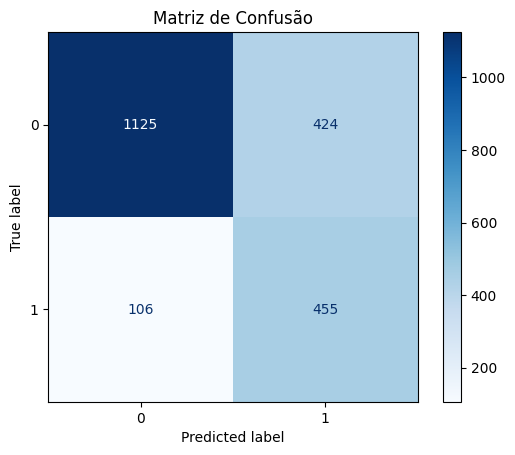

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(modelo_final, x_test, y_test, cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()


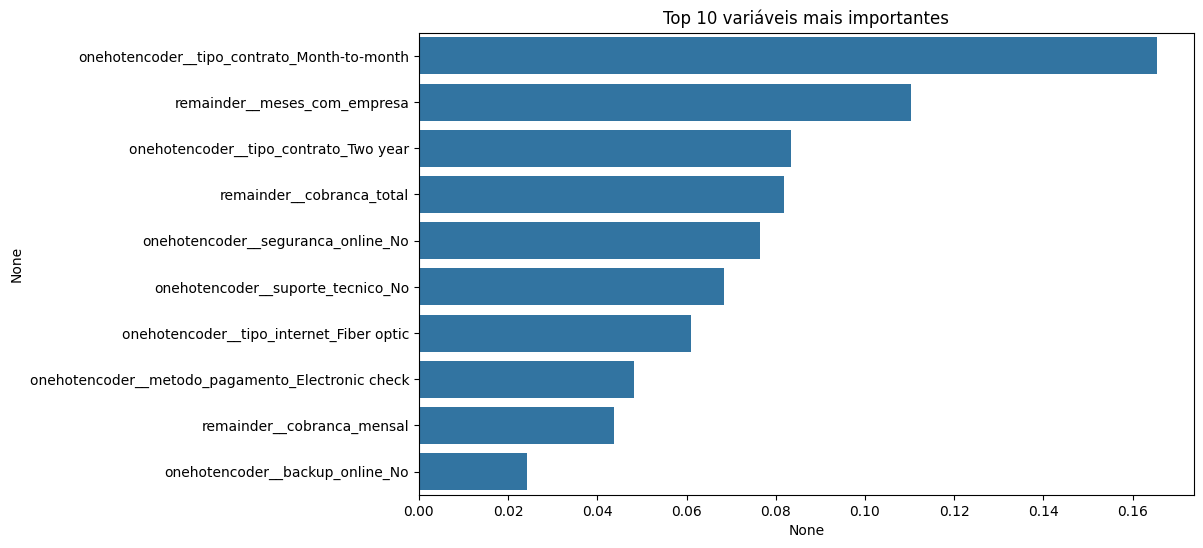

In [70]:
importances = modelo_final.named_steps['rf'].feature_importances_
features = x_train.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title("Top 10 variáveis mais importantes")
plt.show()


In [72]:
import joblib
joblib.dump(modelo_final, 'modelo_churn.pkl')


['modelo_churn.pkl']